In [1]:
# Importing necassary modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('bmh')

from warnings import filterwarnings
filterwarnings('ignore')
import math

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import sklearn.metrics as metrics
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import RFE, SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [2]:
#Importing data
Data_of_Attack_Back_PortSweep=pd.read_csv('Data_of_Attack_Back_PortSweep.csv')
Data_of_Attack_Back=pd.read_csv('Data_of_Attack_Back.csv')
Data_of_Attack_Back_FTPWrite=pd.read_csv('Data_of_Attack_Back_FTPWrite.csv')
Data_of_Attack_Back_GuessPassword=pd.read_csv('Data_of_Attack_Back_GuessPassword.csv')
Data_of_Attack_Back_Neptune=pd.read_csv('Data_of_Attack_Back_Neptune.csv')
Data_of_Attack_Back_NMap=pd.read_csv('Data_of_Attack_Back_NMap.csv')
Data_of_Attack_Back_Normal=pd.read_csv('Data_of_Attack_Back_Normal.csv')
Data_of_Attack_Back_RootKit=pd.read_csv('Data_of_Attack_Back_RootKit.csv')
Data_of_Attack_Back_Satan=pd.read_csv('Data_of_Attack_Back_Satan.csv')
Data_of_Attack_Back_Smurf=pd.read_csv('Data_of_Attack_Back_Smurf.csv')
Data_of_Attack_Back_BufferOverflow=pd.read_csv('Data_of_Attack_Back_BufferOverflow.csv')


Data Preparation

In [3]:
#Creating attack variable
Data_of_Attack_Back_PortSweep['attack']='PortSweep'
Data_of_Attack_Back['attack']='Back'
Data_of_Attack_Back_FTPWrite['attack']='FTPWrite'
Data_of_Attack_Back_GuessPassword['attack']='GuessPassword'
Data_of_Attack_Back_Neptune['attack']='Neptune'
Data_of_Attack_Back_NMap['attack']='NMap'
Data_of_Attack_Back_Normal['attack']='Normal'
Data_of_Attack_Back_RootKit['attack']='RootKit'
Data_of_Attack_Back_Satan['attack']='Satan'
Data_of_Attack_Back_Smurf['attack']='Smurf'
Data_of_Attack_Back_BufferOverflow['attack']='BufferOverflow'

In [4]:
# Merging all the tables
data= pd.concat([Data_of_Attack_Back_PortSweep,Data_of_Attack_Back,
Data_of_Attack_Back_FTPWrite, Data_of_Attack_Back_GuessPassword,
Data_of_Attack_Back_Neptune,Data_of_Attack_Back_NMap,
Data_of_Attack_Back_Normal,Data_of_Attack_Back_RootKit,
Data_of_Attack_Back_Satan,Data_of_Attack_Back_Smurf,
Data_of_Attack_Back_BufferOverflow], axis=0,
ignore_index = True,sort = False)

In [5]:
data.shape

(817551, 42)

In [6]:
# Removing outer spaces from the column names
data.columns= data.columns.str.strip()

In [7]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack'],
      dtype='object')

In [ ]:
# Checking missing values
data.isna().sum().sum()

0

In [8]:
# Changing the datatypes of the columns
data[['protocol_type','service','flag','land','logged_in',
'root_shell','su_attempted','is_host_login','is_guest_login']]=data[['protocol_type','service','flag','land',
'logged_in','root_shell','su_attempted','is_host_login','is_guest_login']].astype('O')

In [9]:
#Making different groups of features for EDA
df_num= data.select_dtypes(include=['int64','float64'])

Basic_features=['duration', 'protocol_type', 'flag', 'src_bytes','dst_bytes', 'land', 'wrong_fragment', 'urgent']

Content_related_features=['hot','num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells','num_access_files', 'num_outbound_cmds', 'is_host_login','is_guest_login']

Time_realted_features=['count', 'srv_count', 'serror_rate', 'srv_error_rate','rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 
'diff_srv_rate','srv_diff_host_rate']

Host_based_features=['dst_host_count', 'dst_host_srv_count','dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate','dst_host_serror_rate', 'dst_host_srv_serror_rate',
'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

# EDA

In [ ]:
# Printing the info about columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817551 entries, 0 to 817550
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     817551 non-null  float64
 1   protocol_type                817551 non-null  object 
 2   service                      817551 non-null  object 
 3   flag                         817551 non-null  object 
 4   src_bytes                    817551 non-null  float64
 5   dst_bytes                    817551 non-null  float64
 6   land                         817551 non-null  object 
 7   wrong_fragment               817551 non-null  float64
 8   urgent                       817551 non-null  float64
 9   hot                          817551 non-null  float64
 10  num_failed_logins            817551 non-null  float64
 11  logged_in                    817551 non-null  object 
 12  num_compromised              817551 non-null  float64
 13 

In [ ]:
# Describing the dataset
data.describe(percentiles=[0.1,0.3,0.5,0.7,0.9])

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,817551.000000,817551.000000,817551.000000,8.175510e+05,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,...,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000
mean,0.000877,0.004961,0.024862,3.669496e-07,0.000003,0.002456,0.000016,0.000275,0.001463,0.000284,...,0.166868,0.161651,0.066795,0.003380,0.006148,0.001683,0.024865,0.024852,0.005372,0.005279
std,0.026636,0.033235,0.066635,3.317904e-04,0.000805,0.041470,0.001618,0.010338,0.031777,0.011742,...,0.102058,0.111642,0.043421,0.008557,0.017460,0.003708,0.043062,0.043151,0.021920,0.022070
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013000,0.007000,0.003000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.077000,0.023000,0.017000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.002170,0.003670,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.255000,0.255000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
70%,0.000000,0.002840,0.014810,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.255000,0.255000,0.100000,0.005000,0.002000,0.002000,0.000000,0.000000,0.000000,0.000000
90%,0.000000,0.003670,0.066910,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.255000,0.255000,0.100000,0.008000,0.014000,0.005000,0.100000,0.100000,0.000000,0.000000
max,1.000000,1.000000,1.000000,3.000000e-01,0.500000,1.000000,0.500000,1.000000,1.000000,1.000000,...,0.255000,0.255000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


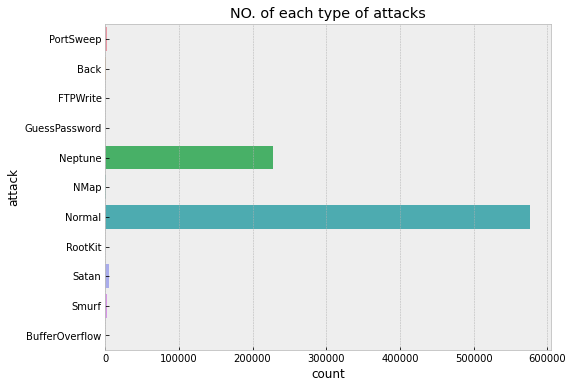

In [ ]:
# Counts for each type of attacks
plt.figure(figsize=[8,6])
sns.countplot(y=data['attack'],)
plt.title('NO. of each type of attacks')
plt.show()

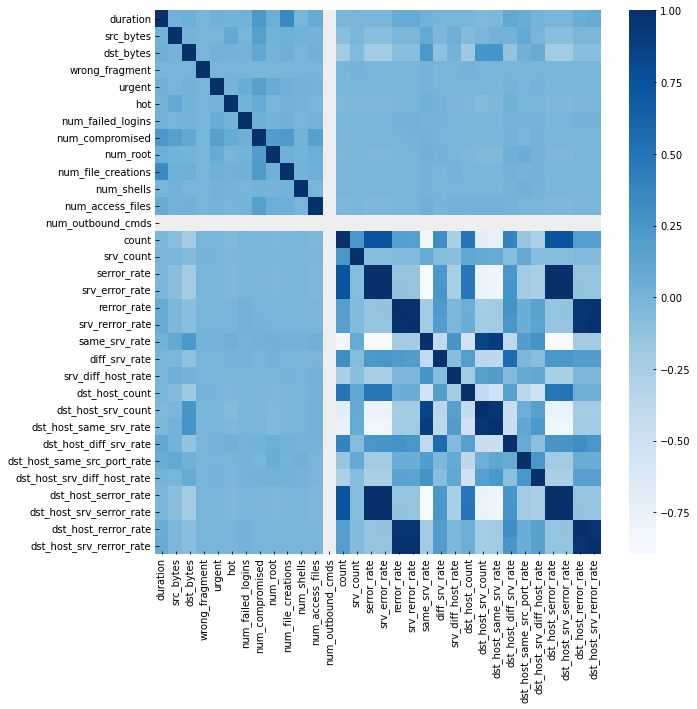

In [ ]:
# Plotting correlation
plt.figure(figsize=[10,10])
sns.heatmap(data.corr(),cmap="Blues")
plt.show()

In [10]:
# Function to create distribution for all columns
def distribution(x, title=''):
    fig, axes= plt.subplots(ncols=3, nrows=math.ceil(x.__len__()/3), figsize=[22,math.ceil(x.__len__()/3)*(4.5)],clear=True)
    j=0
    for num, i in enumerate(x):
        if data[i].dtypes=='O' :
            sns.countplot(data[i], ax= axes[math.floor(num/3),j])
        else :
            sns.distplot(data[i], ax= axes[math.floor(num/3),j])
        plt.xlabel(i)
        j+=1
        if j==3:
            j=0
    plt.suptitle(f'Distributions for {title}')
    if  (3*math.ceil(x.__len__()/3))-x.__len__()== 2:
        plt.delaxes(axes[(math.ceil(x.__len__()/3)-1)][2])
        plt.delaxes(axes[(math.ceil(x.__len__()/3)-1)][1])
    elif(3*math.ceil(x.__len__()/3))-x.__len__()==1:
        plt.delaxes(axes[(math.ceil(x.__len__()/3)-1)][2])

    plt.show()

    # Function to create bar plots of numerical variables with the target variabe
def feature_target_relation(x, title=''):
    x=data[x].select_dtypes(include=['int64','float64'])
    fig, axes= plt.subplots(ncols=2, nrows=math.ceil(x.shape[1]/2), figsize=[20,math.ceil(x.shape[1]/2)*(4)])
    j=0
    for num, i in enumerate(x):
        sns.barplot(y=data.attack, x=data[i], ax= axes[math.floor(num/2),j])
        plt.xlabel(i)
        j+=1
        if j==2:
            j=0
    plt.suptitle(f'Barplots for {title}')
    if  (2*math.ceil(x.shape[1]/2))-x.shape[1]== 1:
        plt.delaxes(axes[(math.ceil(x.shape[1]/2)-1)][1])
    plt.show()

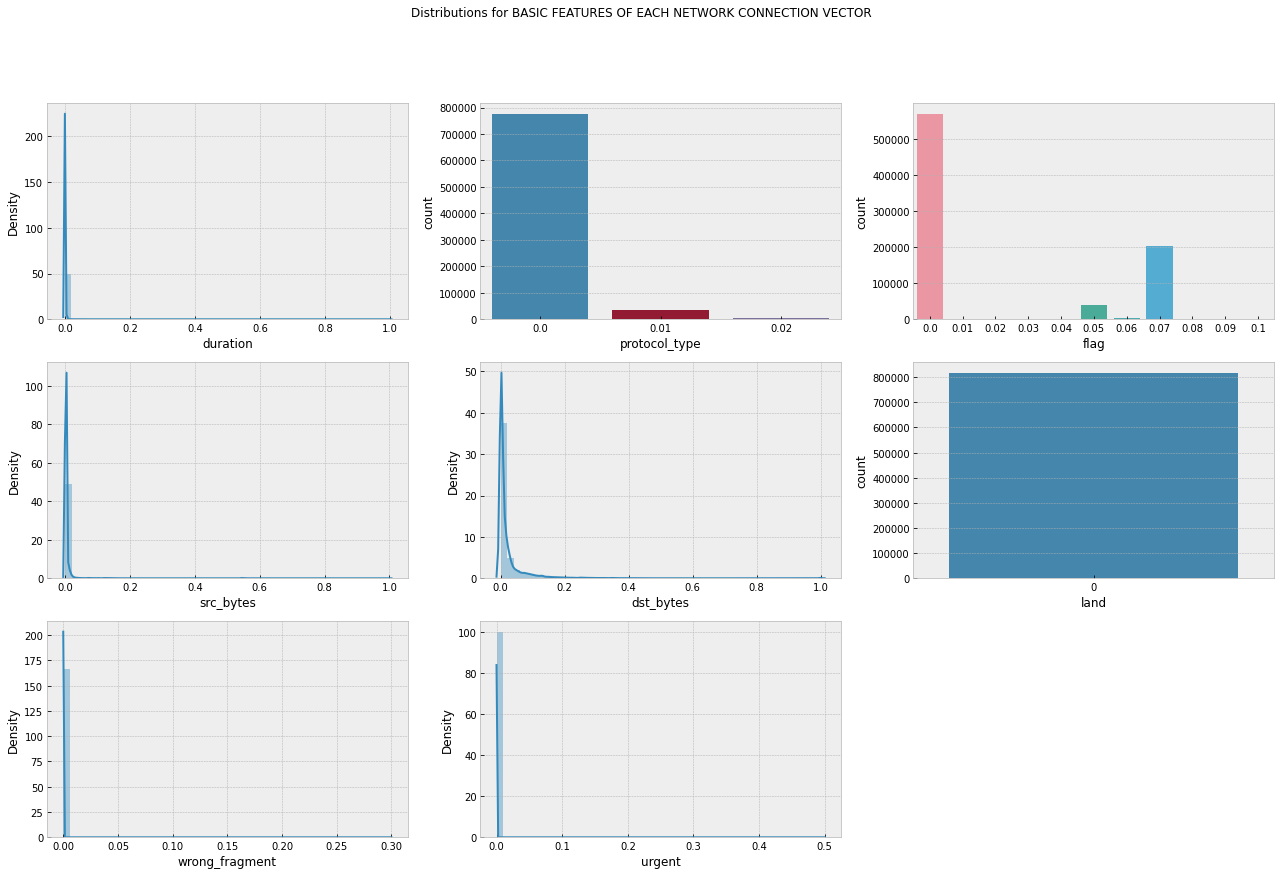

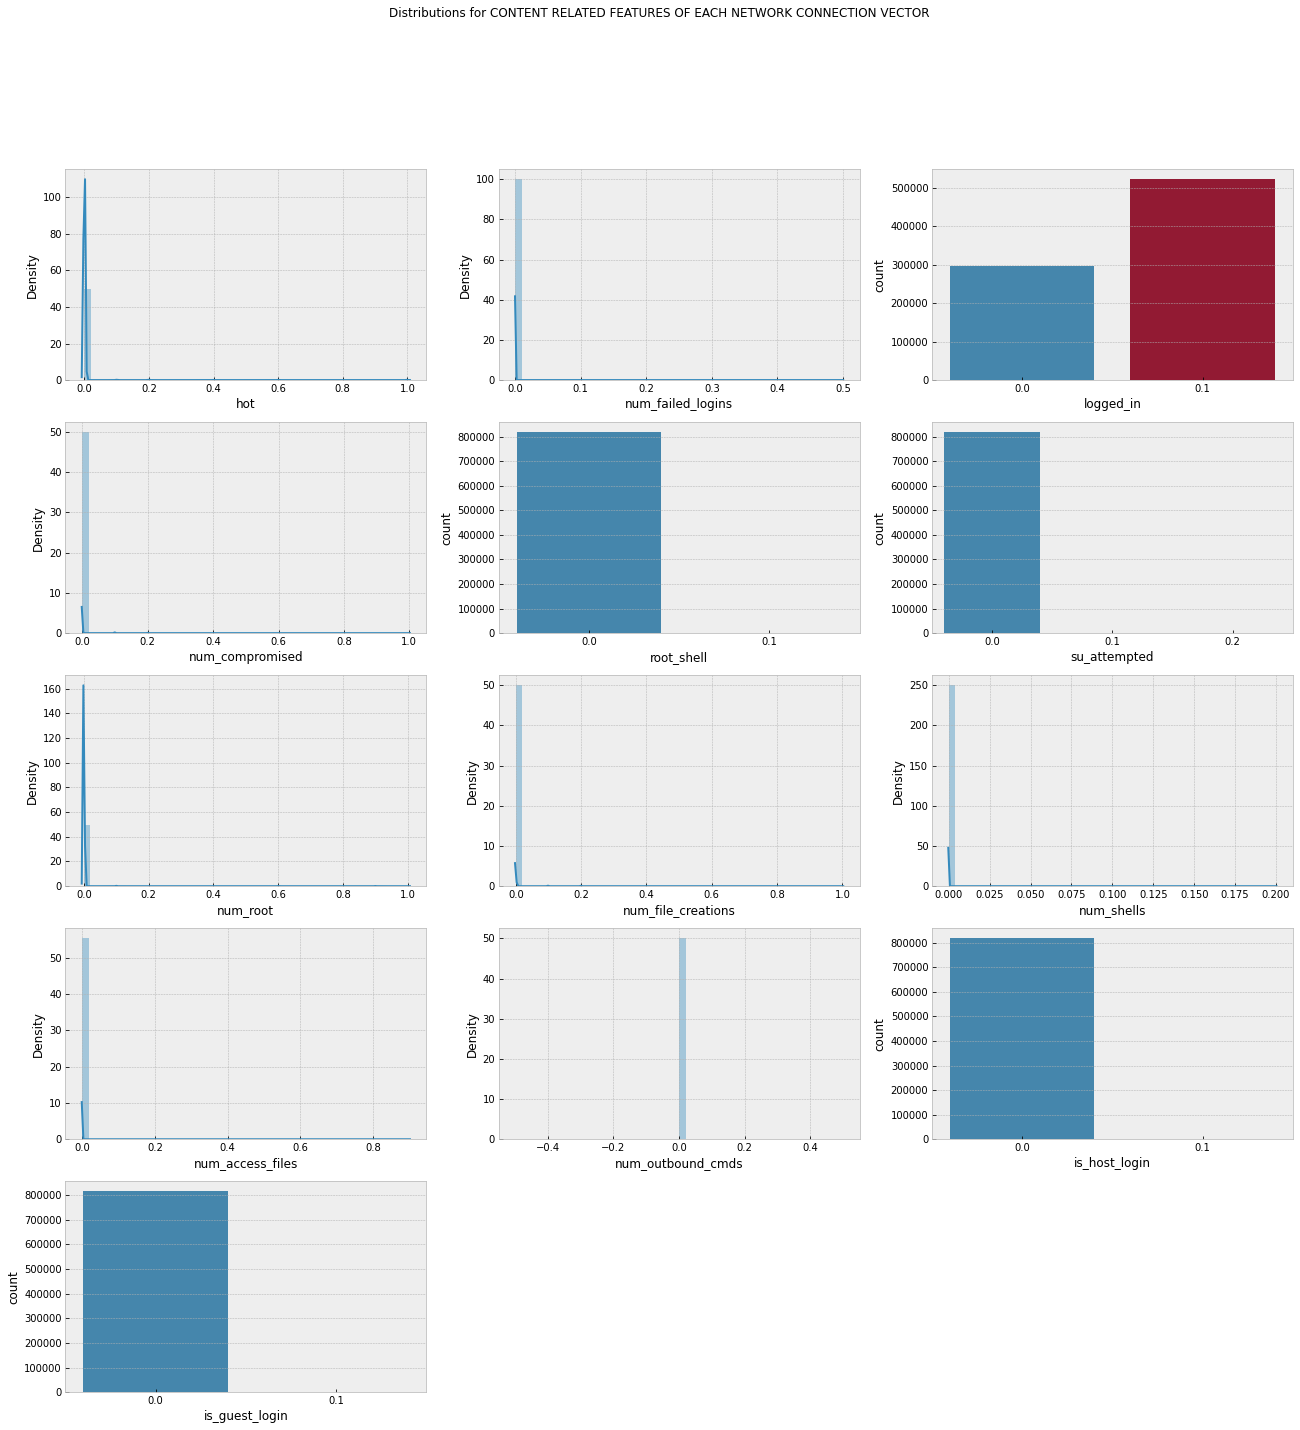

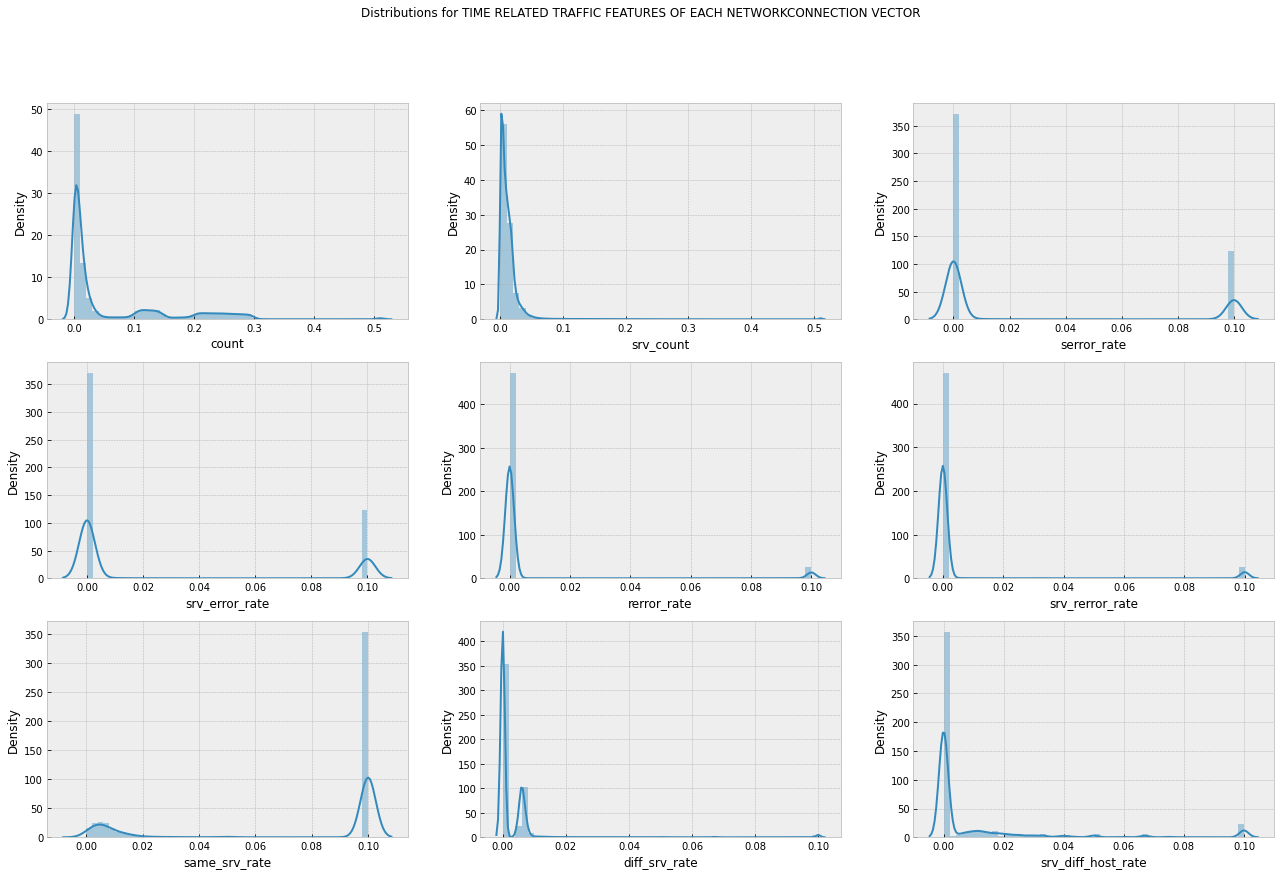

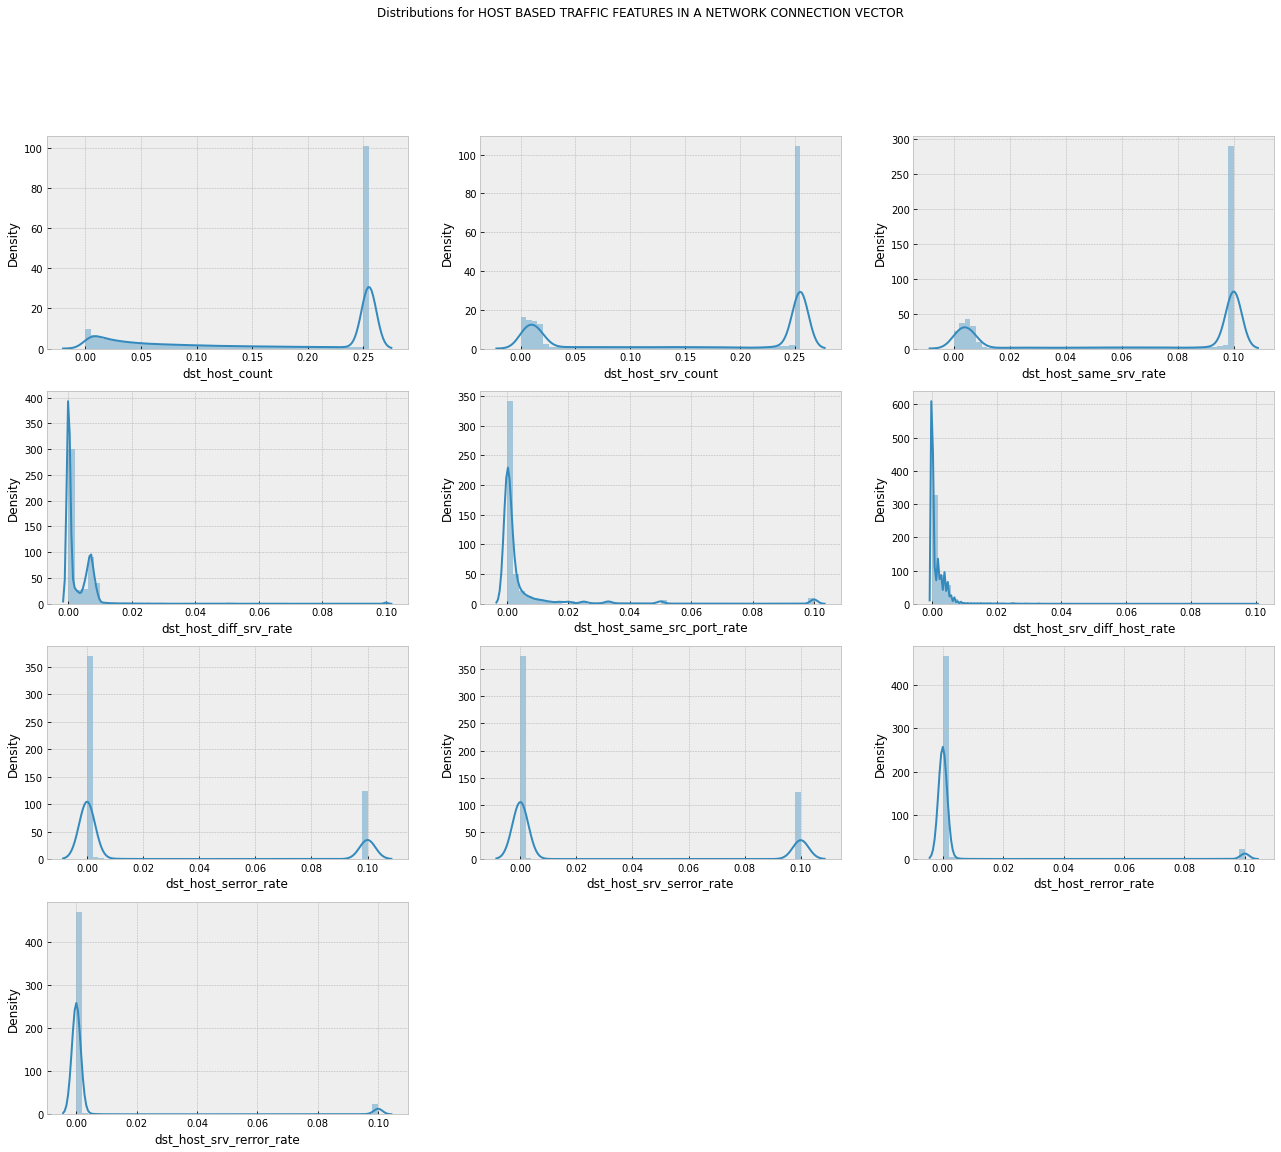

In [11]:
# Distirbutions 
distribution(Basic_features, 'BASIC FEATURES OF EACH NETWORK CONNECTION VECTOR')
distribution(Content_related_features, 'CONTENT RELATED FEATURES OF EACH NETWORK CONNECTION VECTOR')
distribution(Time_realted_features, 'TIME RELATED TRAFFIC FEATURES OF EACH NETWORKCONNECTION VECTOR')
distribution(Host_based_features,'HOST BASED TRAFFIC FEATURES IN A NETWORK CONNECTION VECTOR')

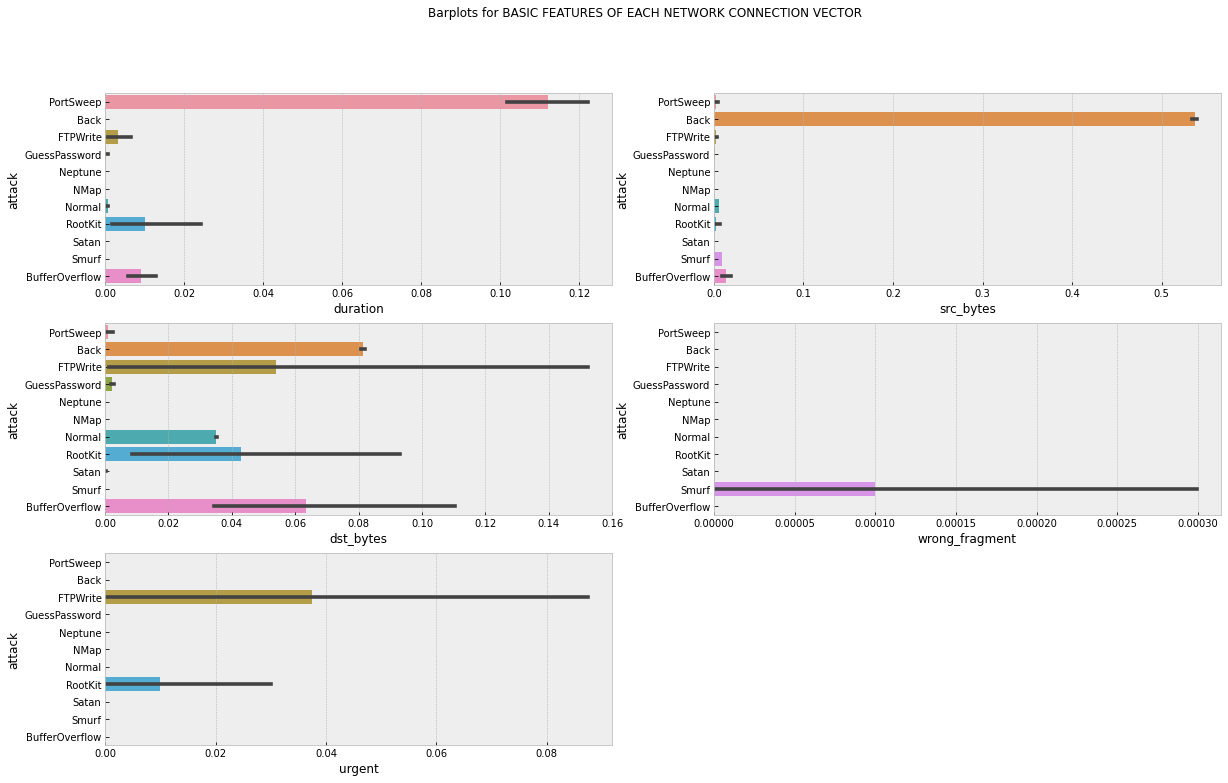

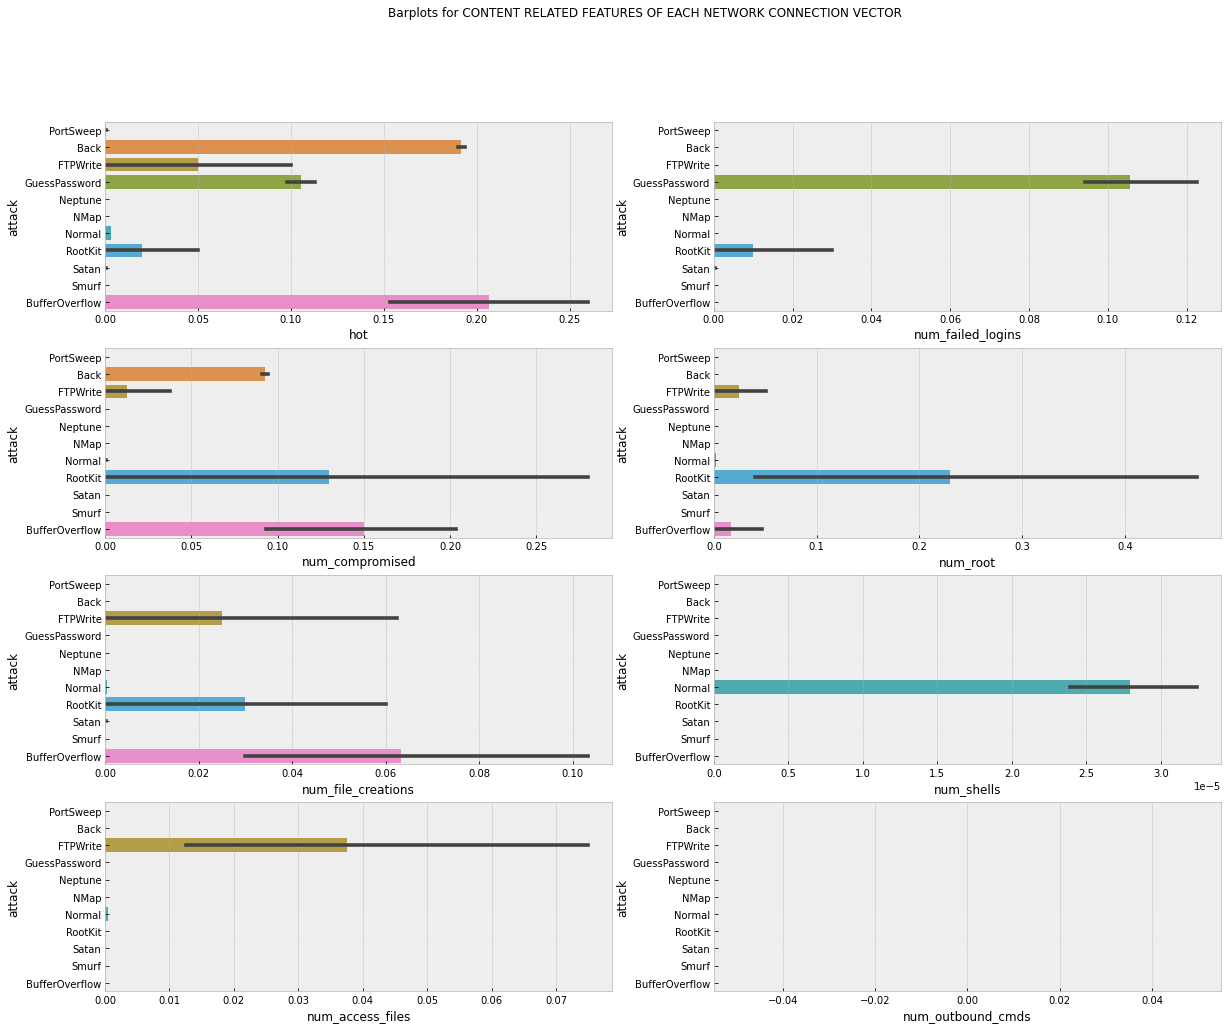

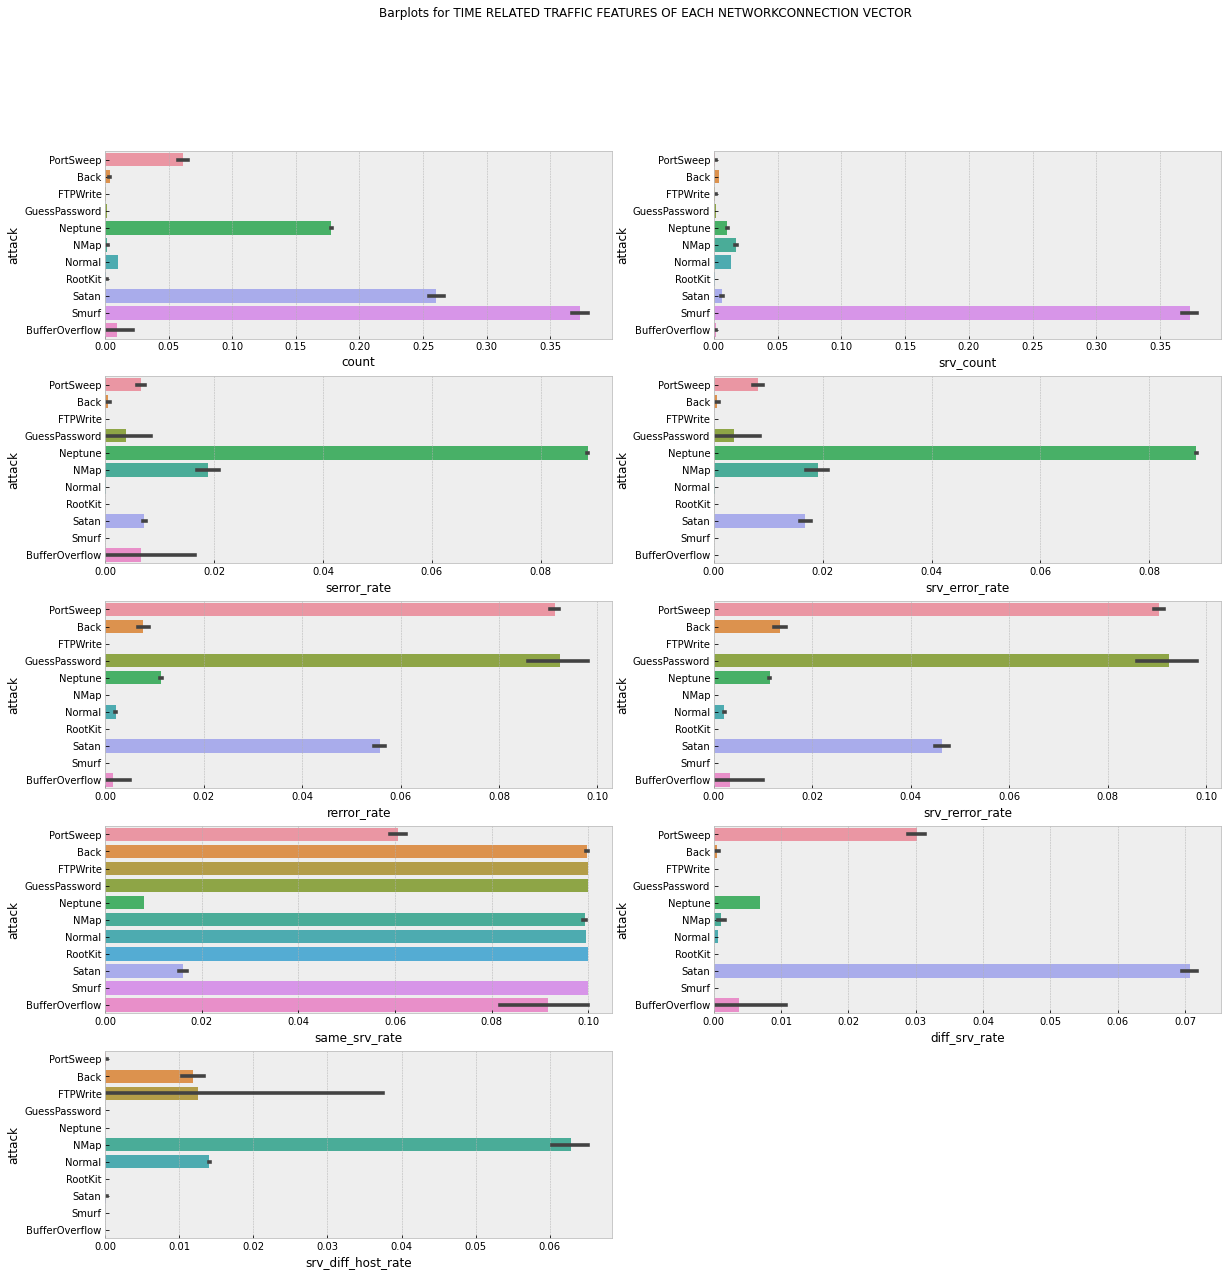

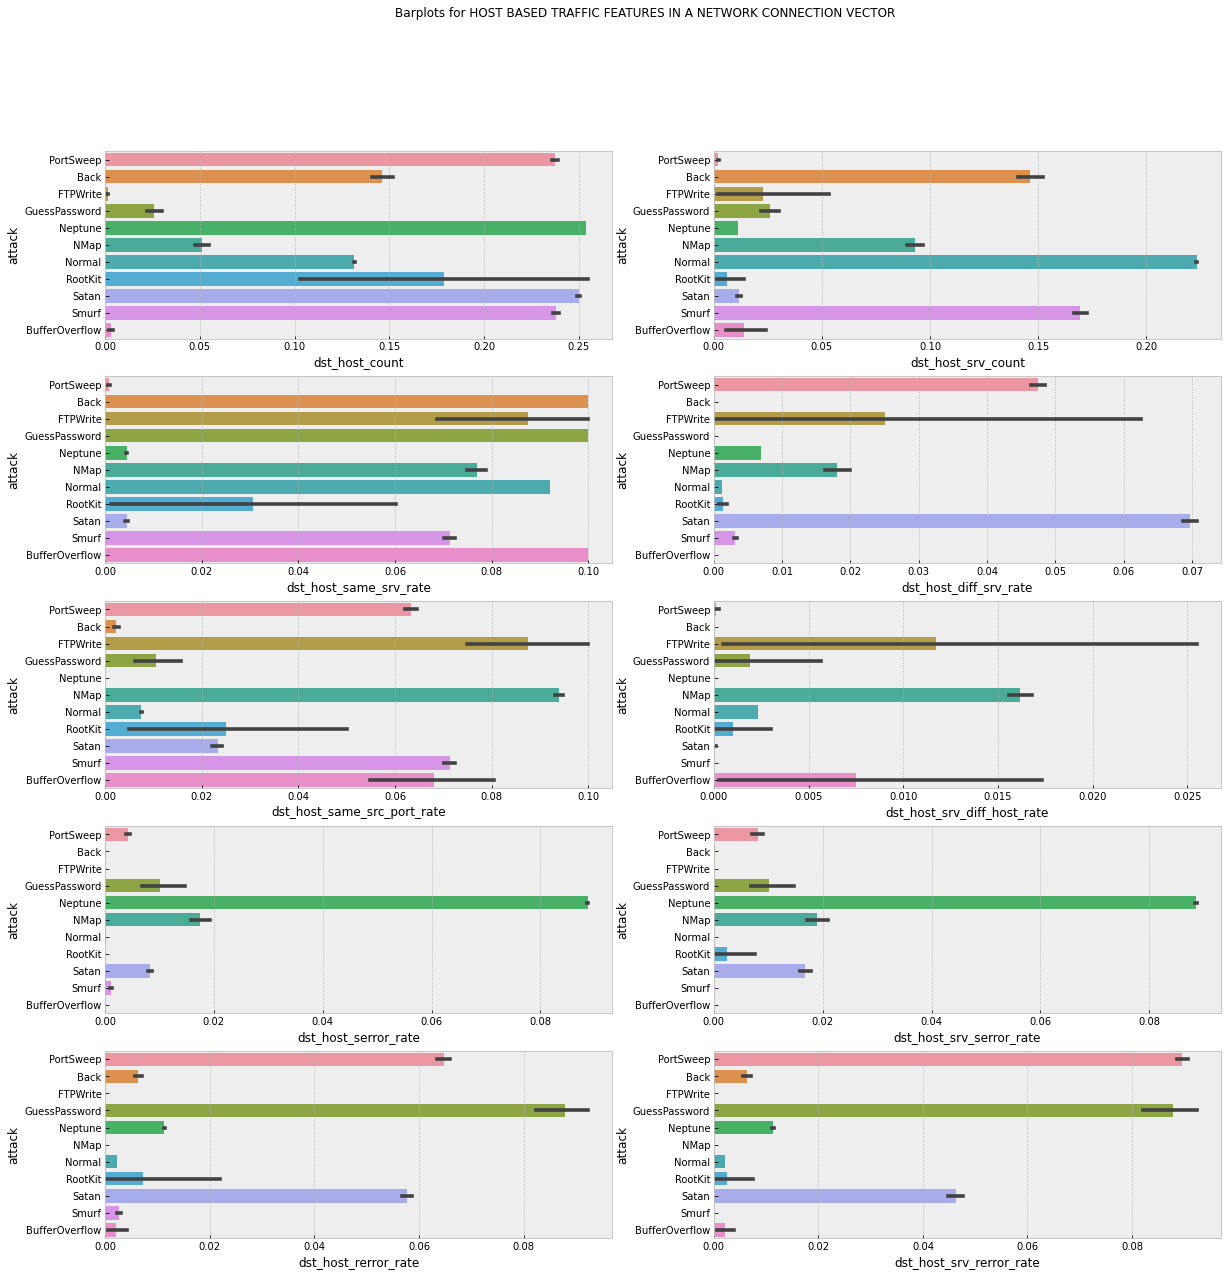

In [12]:
# Barplots for feature- target relations
feature_target_relation(Basic_features, 'BASIC FEATURES OF EACH NETWORK CONNECTION VECTOR')
feature_target_relation(Content_related_features, 'CONTENT RELATED FEATURES OF EACH NETWORK CONNECTION VECTOR')
feature_target_relation(Time_realted_features, 'TIME RELATED TRAFFIC FEATURES OF EACH NETWORKCONNECTION VECTOR')
feature_target_relation(Host_based_features,'HOST BASED TRAFFIC FEATURES IN A NETWORK CONNECTION VECTOR')

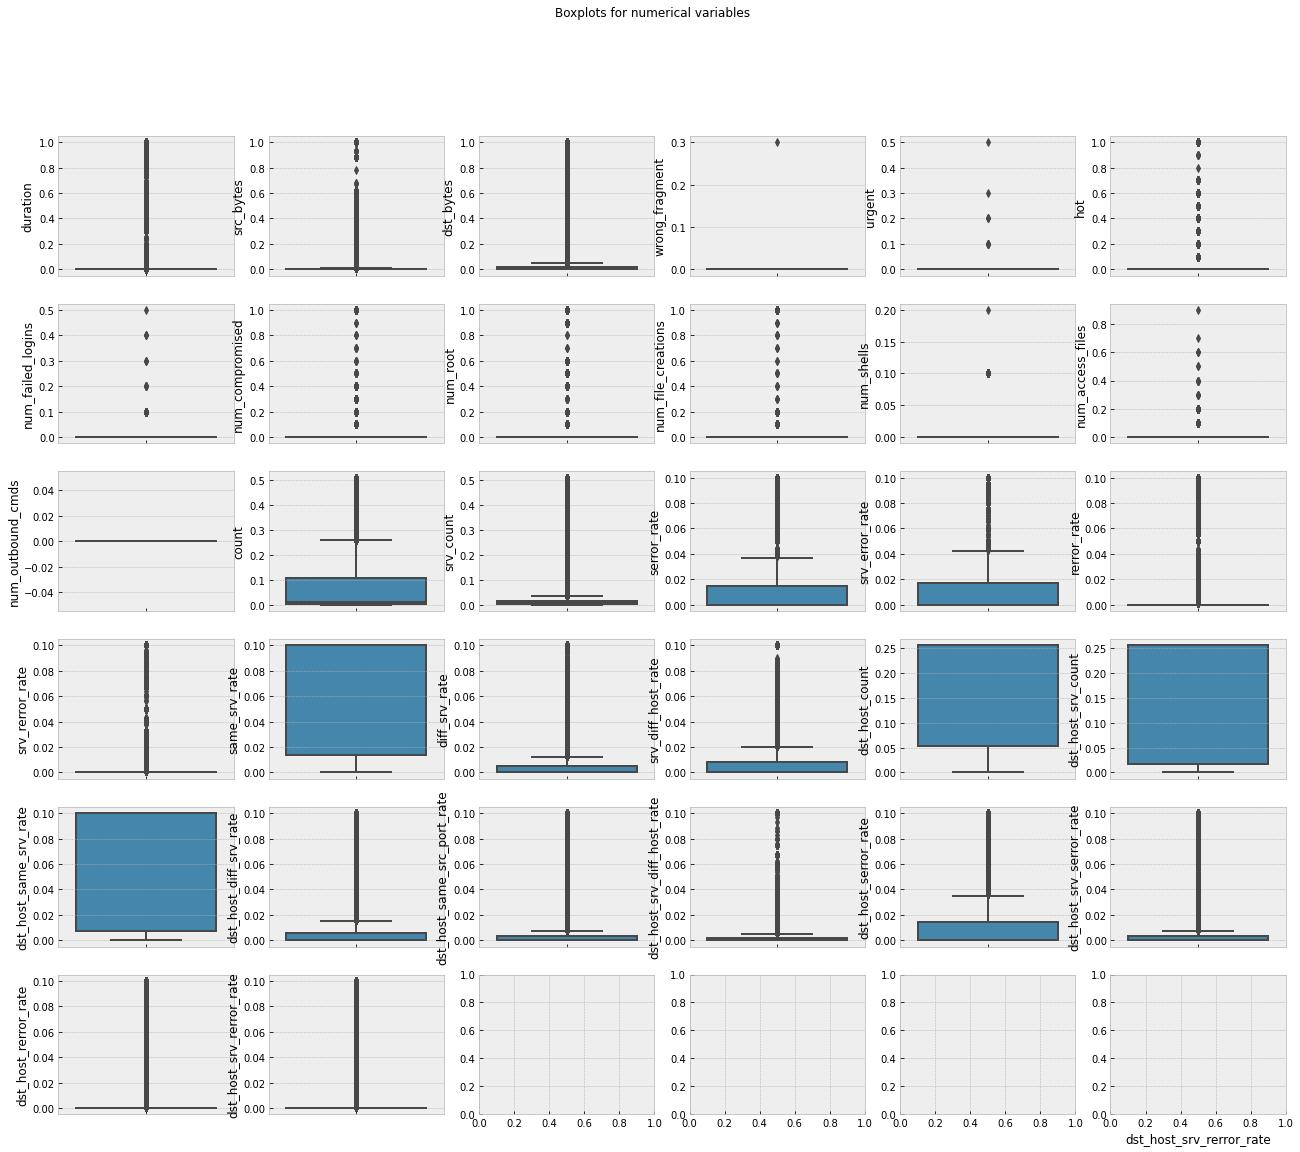

In [13]:
# Plotting boxplots for all numerical features
fig, axes= plt.subplots(ncols=6, nrows=6, figsize=[22,18], squeeze=True)
j=0
for num, i in enumerate(df_num):
    sns.boxplot(y=data[i], ax= axes[math.floor(num/6),j])
    plt.xlabel(i)
    j+=1
    if j==6:
      j=0
plt.suptitle('Boxplots for numerical variables')
plt.show()

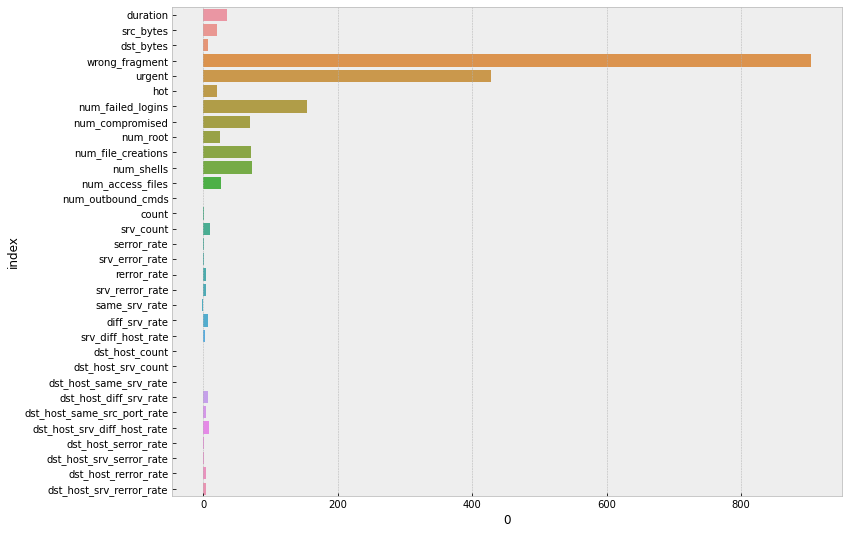

In [14]:
# Checking the skewness of data
skewness={}
for i in data.select_dtypes(include=['int64','float64']):
  skewness[i]=data[i].skew()
plt.figure(figsize=[12,9])
skew=pd.DataFrame.from_dict(skewness,orient ='index').reset_index()
sns.barplot(y=skew['index'],x=skew[0])
plt.show()

Data preparation continued

In [19]:
# Creating different columns for binary classification 
data['Normal']= np.where(data['attack']=='Normal','1','0')

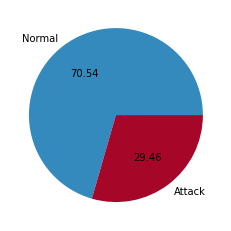

In [ ]:
# Checking if the data is imbalances
plt.pie(data['Normal'].value_counts() ,autopct='%.2f',labels=['Normal','Attack'])
plt.show()
# We can see that the data is imbalanced

In [ ]:
# Checking the value counts
data['Normal'].value_counts()

1    576710
0    240841
Name: Normal, dtype: int64

Feature Selection and data preparation continued

In [ ]:
# The dataset is quite big and because of lack of processing power, we will take a sample from the data and use it for
# Features selection and also to find best parameters for models.

In [20]:
# Taking a 10% sample from the dataset
df= data.sample(frac=0.1, random_state=1)

In [21]:
# Splitting sample_features and sample_targets
sample_target=df['Normal']
sample_features= df.drop(columns=['Normal','attack'])

In [22]:
# We will process the whole dataset parallely
target=data['Normal']
features= data.drop(columns=['Normal','attack'])

In [23]:
# Splitting the data in features and target variables
x_train, x_test, y_train, y_test= train_test_split(features ,target , test_size=0.3, random_state=385)

In [ ]:
sample_features.shape

(81755, 41)

In [24]:
# Outlier treatment:
# We are trying to minimize the  outliers by clipping the continuous columns because outliers can affect the accuracy of our analysis.
def outlier(x):
    if x.dtype in ['float64','int64']:
        np.clip(x, a_max = x.quantile(0.95), a_min = x.quantile(0.05) )
    return x

x_train = x_train.apply(outlier)
x_test = x_test.apply(outlier)
sample_features= sample_features.apply(outlier)


In [ ]:
# Encoding the datasets
sample_features= pd.get_dummies(sample_features, drop_first=True)
x_train_1= pd.get_dummies(x_train, drop_first=True)
x_test_1= pd.get_dummies(x_test, drop_first=True)

RFE for feature selection


In [ ]:
# This will be perfomed on sample data, then those columns will be used for full data

In [25]:
# Fitting RFE model and getting important features
rfe_model= RFE(RandomForestClassifier(),n_features_to_select=60,verbose=True).fit(sample_features, sample_target)
l1 = sample_features[sample_features.columns[rfe_model.support_]].columns

Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator 

In [26]:
# Feature selection with selectKbest
sk= SelectKBest(score_func=f_classif, k=60 ).fit(sample_features,sample_target)
l2 = sample_features[sample_features.columns[sk.get_support()]].columns

In [27]:
# We will use the variables given by both RFE and SelectKBest
l3= set(l1).intersection(l2)
sample_features_new=sample_features[l3]
x_train_new= x_train_1[l3]
x_test_new= x_test_1[l3]

In [28]:
# By VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(x, drop=[]):
    x = x.drop(columns = drop)
    output = pd.DataFrame()
    output['columns'] = x.columns
    x= x.values.astype(float)
    output['VIF'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
    return output.sort_values(by='VIF', ascending= False)

In [29]:
d = VIF(sample_features_new,drop = ['srv_error_rate','dst_host_srv_serror_rate','serror_rate','flag_0.07','dst_host_serror_rate','rerror_rate','flag_0.05',
                                    'same_srv_rate','srv_rerror_rate','dst_host_same_srv_rate','logged_in_0.1',
                                    'dst_host_srv_rerror_rate'
                                    ])
l_final=d['columns']
d

,columns,VIF
10,protocol_type_0.01,11.805971
19,service_0.02,11.467463
4,dst_host_count,5.542975
17,dst_host_srv_count,3.721604
7,count,3.711710
11,service_0.12,3.159697
13,protocol_type_0.02,2.960029
1,service_0.09,2.882741
12,dst_host_diff_srv_rate,2.494782
0,dst_host_same_src_port_rate,1.786503


In [30]:
# Taking most important features
sample_features_final= sample_features_new[l_final]
x_train_new= x_train_1[l_final]
x_test_new= x_test_1[l_final]

Modelling


In [31]:
# Logistic regression
L_model = LogisticRegression().fit(x_train_new, y_train)

In [32]:
# Calculating metrics (roc_auc_score, accuracy, recall and precision) for the model
print('Train roc_auc score:',metrics.roc_auc_score(y_train, L_model.predict_proba(x_train_new)[:,1]))
print('Test roc_auc_score:',metrics.roc_auc_score(y_test, L_model.predict_proba(x_test_new)[:,1]))

print('Train accuracy:',metrics.accuracy_score(y_train, L_model.predict(x_train_new)))
print('Test accuracy:',metrics.accuracy_score(y_test, L_model.predict(x_test_new)))

Train roc_auc score: 0.9992719952706847
Test roc_auc_score: 0.9992094661647303
Train accuracy: 0.9941410311295945
Test accuracy: 0.9941492094297619


In [33]:
# KNN CLassifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_clf.fit(x_train_new,y_train)

KNeighborsClassifier()

In [ ]:
# Calculating metrics (roc_auc_score, accuracy, recall and precision) for the model
print('Train roc_auc score:',metrics.roc_auc_score(y_train, knn_clf.predict_proba(x_train_new)[:,1]))
print('Test roc_auc_score:',metrics.roc_auc_score(y_test, knn_clf.predict_proba(x_test_new)[:,1]))

print('Train accuracy:',metrics.accuracy_score(y_train, knn_clf.predict(x_train_new)))
print('Test accuracy:',metrics.accuracy_score(y_test, knn_clf.predict(x_test_new)))

In [ ]:
# # Bagging Model

# pargrid_ada = {'n_estimators': [50,60,70,80,100]}

# gscv_bagging = GridSearchCV(estimator=BaggingClassifier(), 
#                         param_grid=pargrid_ada, 
#                         cv=3,n_jobs=-1)

# data_bagg =gscv_bagging.fit(sample_features_final, sample_target)
# data_bagg.best_params_

In [34]:
# Building bagging model
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(n_estimators=50,n_jobs=-1)
bag_clf.fit( x_train_new, y_train )


BaggingClassifier(n_estimators=50, n_jobs=-1)

In [35]:
# Calculating metrics (roc_auc_score, accuracy, recall and precision) for the model
print('Train roc_auc score:',metrics.roc_auc_score(y_train, bag_clf.predict_proba(x_train_new)[:,1]))
print('Test roc_auc_score:',metrics.roc_auc_score(y_test, bag_clf.predict_proba(x_test_new)[:,1]))

print('Train accuracy:',metrics.accuracy_score(y_train, bag_clf.predict(x_train_new)))
print('Test accuracy:',metrics.accuracy_score(y_test, bag_clf.predict(x_test_new)))

Train roc_auc score: 0.9999999968366284
Test roc_auc_score: 0.9999410131119231
Train accuracy: 0.9999807788077618
Test accuracy: 0.9997064411699951


In [ ]:
# #Random Forest

# RF_para_grid= {
#     'max_depth': [5,6,7],
#     'max_leaf_nodes':[20,30,40],
#     'n_estimators':[50,60,70],
#     'max_features':[20,30,40]
# }
# gscv_Rf = GridSearchCV(estimator=RandomForestClassifier(), 
#                         param_grid=RF_para_grid, 
#                         cv=5,
#                         verbose=True, n_jobs=4, scoring='roc_auc').fit(sample_features_final, sample_target)

# gscv_Rf.best_params_

In [36]:
# Building Random forest
RF_clf = RandomForestClassifier(oob_score=True,n_estimators=60 , max_depth = 7, max_features=20, max_leaf_nodes= 30,n_jobs=-1)
RF_clf.fit( x_train_new, y_train )


RandomForestClassifier(max_depth=7, max_features=20, max_leaf_nodes=30,
                       n_estimators=60, n_jobs=-1, oob_score=True)

In [37]:
# Calculating metrics (roc_auc_score, accuracy, recall and precision) for the model
print('Train roc_auc score:',metrics.roc_auc_score(y_train, RF_clf.predict_proba(x_train_new)[:,1]))
print('Test roc_auc_score:',metrics.roc_auc_score(y_test, RF_clf.predict_proba(x_test_new)[:,1]))

print('Train accuracy:',metrics.accuracy_score(y_train, RF_clf.predict(x_train_new)))
print('Test accuracy:',metrics.accuracy_score(y_test, RF_clf.predict(x_test_new)))

Train roc_auc score: 0.9999039588359018
Test roc_auc_score: 0.9999089488976496
Train accuracy: 0.9990913618214701
Test accuracy: 0.9991030146860959


In [ ]:
# #Gradient Boost

# parameters = {
#     "learning_rate": [0.01, 0.1, 0.2],
#     "min_samples_split": np.linspace(0.1, 0.5, 4),
#     "min_samples_leaf": np.linspace(0.1, 0.5, 4),
#     "max_depth":[5,8,10],
#     "subsample":[0.5, 0.618, 0.85, 0.9, 1.0],
#     "n_estimators":[50,100]
#     }


# gscv_gb = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, n_jobs=-1, verbose=True).fit(sample_features_final, sample_target)
# gscv_gb.best_params_

In [38]:
# Building gradient boost model
gb_clf= GradientBoostingClassifier(learning_rate=0.2, 
                               max_depth=8, 
                               min_samples_leaf=0.1, 
                               min_samples_split=0.1,
                               n_estimators=50,
                               subsample=1.0).fit(x_train_new, y_train)

In [39]:
# Calculating metrics (roc_auc_score, accuracy, recall and precision) for the model
print('Train roc_auc score:',metrics.roc_auc_score(y_train, gb_clf.predict_proba(x_train_new)[:,1]))
print('Test roc_auc_score:',metrics.roc_auc_score(y_test, gb_clf.predict_proba(x_test_new)[:,1]))

print('Train accuracy:',metrics.accuracy_score(y_train, gb_clf.predict(x_train_new)))
print('Test accuracy:',metrics.accuracy_score(y_test, gb_clf.predict(x_test_new)))

Train roc_auc score: 0.9997993163324332
Test roc_auc_score: 0.999785185687116
Train accuracy: 0.9956402841241689
Test accuracy: 0.9956781616693712


# Multinomial classification

In [ ]:
# Here features are same, just target variable is changed
# Because of lack of processing power, multinomial classification is performed on sample data

In [ ]:
# Splitting sample_features and sample_targets
# df= data.sample(frac=0.1, random_state=1)
mul_target=df['attack']
mul_features= df.drop(columns=['Normal','attack'])

In [ ]:
# Encoding the target variables
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
mul_target=pd.Series(encoder.fit_transform(mul_target))

In [ ]:
print(encoder.classes_)

['Back' 'BufferOverflow' 'FTPWrite' 'GuessPassword' 'NMap' 'Neptune'
 'Normal' 'PortSweep' 'Satan' 'Smurf']


In [ ]:
# Splitting the data in features and target variables

x_train_mul, x_test_mul, y_train_mul, y_test_mul= train_test_split(mul_features ,mul_target , test_size=0.2, random_state=85)

In [ ]:
# Outlier treatment:
# We are trying to minimize the  outliers by clipping the continuous columns because outliers can affect the accuracy of our analysis.
def outlier(x):
    if x.dtype in ['float64','int64']:
        np.clip(x, a_max = x.quantile(0.95), a_min = x.quantile(0.05) )
    return x

x_train_mul = x_train_mul.apply(outlier)
x_test_mul = x_test_mul.apply(outlier)

In [ ]:
# Encoding all the tabels
x_train_mul= pd.get_dummies(x_train_mul, drop_first=True)
x_test_mul= pd.get_dummies(x_test_mul, drop_first=True)

In [ ]:
# Taking only the important features
x_train_mul=x_train_mul[l_final]
x_test_mul=x_test_mul[l_final]

In [ ]:
# Balancing the dataset
from imblearn.over_sampling import SMOTE
balancer= SMOTE(k_neighbors=1)
x_train_bal, y_train_bal= balancer.fit_resample(x_train_mul, y_train_mul)

Modelling

In [ ]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
knn_clf_mul = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_clf_mul.fit(x_train_bal,y_train_bal)

KNeighborsClassifier()

In [ ]:
# Calculating metrics for the mode

print('Train accuracy:',metrics.classification_report(y_train_bal, knn_clf_mul.predict(x_train_bal)))
print('Test accuracy:',metrics.classification_report(y_test_mul, knn_clf_mul.predict(x_test_mul)))

In [ ]:
# Gradient boost model
gb_clf= GradientBoostingClassifier(learning_rate=0.2, 
                               max_depth=8, 
                               min_samples_leaf=0.1, 
                               min_samples_split=0.1,
                               n_estimators=50,
                               subsample=1.0).fit(x_train_bal, y_train_bal)

In [ ]:
# Calculating metrics for the model

print('Train accuracy:',metrics.classification_report(y_train_bal, gb_clf.predict(x_train_bal)))
print('Test accuracy:',metrics.classification_report(y_test_mul, gb_clf.predict(x_test_mul)))

Train accuracy:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46091
           1       1.00      1.00      1.00     46091
           2       1.00      1.00      1.00     46091
           3       1.00      1.00      1.00     46091
           4       1.00      1.00      1.00     46091
           5       1.00      1.00      1.00     46091
           6       1.00      1.00      1.00     46091
           7       1.00      1.00      1.00     46091
           8       1.00      1.00      1.00     46091
           9       1.00      1.00      1.00     46091

    accuracy                           1.00    460910
   macro avg       1.00      1.00      1.00    460910
weighted avg       1.00      1.00      1.00    460910

Test accuracy:               precision    recall  f1-score   support

           0       0.85      1.00      0.92        23
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00    

In [ ]:
# Random forest
RF_clf = RandomForestClassifier(oob_score=True,n_estimators=60 , max_depth = 7, max_features=20, max_leaf_nodes= 30,n_jobs=-1)
RF_clf.fit( x_train_bal, y_train_bal )


RandomForestClassifier(max_depth=7, max_features=20, max_leaf_nodes=30,
                       n_estimators=60, n_jobs=-1, oob_score=True)

In [ ]:
# Calculating metrics for the model

print('Train accuracy:',metrics.classification_report(y_train_bal, RF_clf.predict(x_train_bal)))
print('Test accuracy:',metrics.classification_report(y_test_mul, RF_clf.predict(x_test_mul)))

Train accuracy:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46091
           1       1.00      1.00      1.00     46091
           2       1.00      1.00      1.00     46091
           3       1.00      1.00      1.00     46091
           4       0.95      1.00      0.98     46091
           5       1.00      0.89      0.94     46091
           6       1.00      0.98      0.99     46091
           7       0.89      0.93      0.91     46091
           8       0.93      0.96      0.94     46091
           9       1.00      1.00      1.00     46091

    accuracy                           0.98    460910
   macro avg       0.98      0.98      0.98    460910
weighted avg       0.98      0.98      0.98    460910

Test accuracy:               precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           4       0.19      1.00      0.32        37
           5       1.00      0.89      0.94    

In [ ]:
# XGBOOST Model
from xgboost import XGBClassifier

xg_clf=XGBClassifier(colsample_bytree=1, gamma=0.5, max_depth=3, min_child_weight=5, subsample=1).fit( x_train_bal, y_train_bal )

In [ ]:
# Calculating metrics for the model

print('Train accuracy:',metrics.classification_report(y_train_bal, xg_clf.predict(x_train_bal)))
print('Test accuracy:',metrics.classification_report(y_test_mul, xg_clf.predict(x_test_mul)))

Train accuracy:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46091
           1       1.00      1.00      1.00     46091
           2       1.00      1.00      1.00     46091
           3       1.00      1.00      1.00     46091
           4       1.00      1.00      1.00     46091
           5       1.00      1.00      1.00     46091
           6       1.00      1.00      1.00     46091
           7       1.00      1.00      1.00     46091
           8       1.00      1.00      1.00     46091
           9       1.00      1.00      1.00     46091

    accuracy                           1.00    460910
   macro avg       1.00      1.00      1.00    460910
weighted avg       1.00      1.00      1.00    460910

Test accuracy:               precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.00      0.00      0.00         0
           4       0.95      1.00      0.97    